In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 
import os
%matplotlib inline
import scipy.stats as sps
sns.set(font_scale = 2, style='whitegrid',rc={'figure.figsize':(20,7)})

In [89]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-varenichenko-22/My_practice/Modul_5_Statistics/games.csv')

In [90]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [91]:
df[df.isna().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [93]:
# Удалим записи с пропущенными значениями:
df = df.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [94]:
# Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

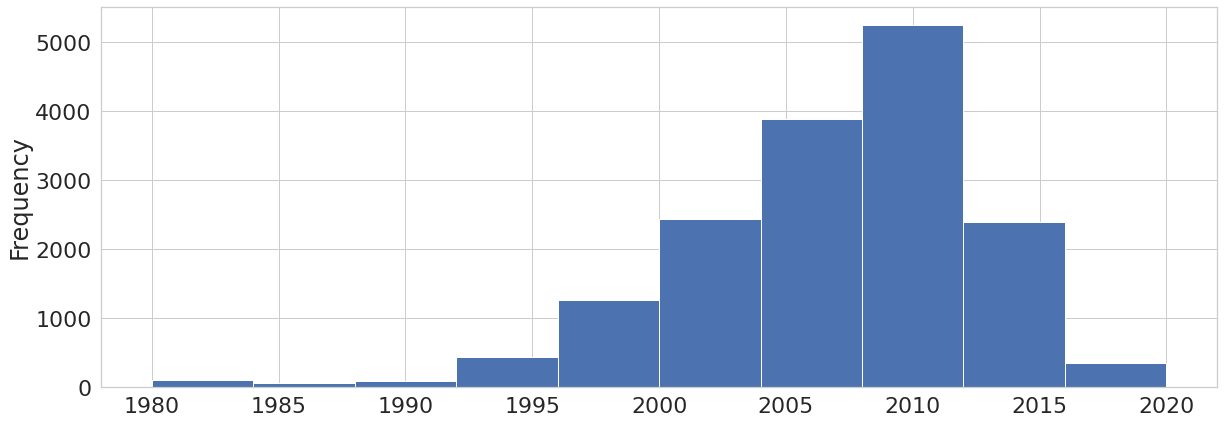

In [96]:
# График распределения количества выпущенных игр по годам

df.Year.plot(kind='hist')

In [13]:
# Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.
df.Year.mode()

0    2009.0
dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


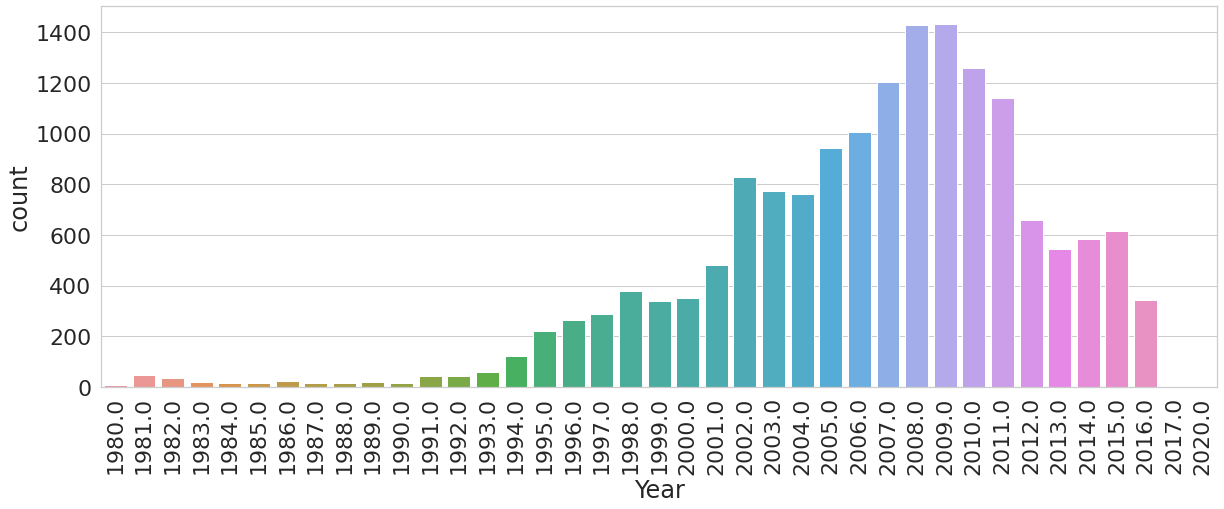

In [20]:
# нарисовать распределение переменной
ax = sns.countplot(df.Year)
ax.tick_params(axis = 'x', rotation = 90)

In [85]:
# На каких платформах произошло больше всего релизов? Оставим названия только тех платформ, частота 
# встречаемости которых составляет более 7%

a = (df.Platform.value_counts() / df.Platform.count() * 100).to_frame()
a[a.Platform > 7].index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [95]:
# Игры каких издателей (Publisher) встречаются в датасете чаще всего?
# В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

sps.mode(df.Publisher)


ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

In [66]:
# Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 
# В каком регионе медианное значение объема продаж является наибольшим?
df.query("Publisher == 'Nintendo'")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] \
    .agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,1.161977,0.595647,0.647824,0.135605,2.541337
median,0.370000,0.120000,0.280000,0.030000,0.890000
std,2.976782,1.736095,1.059476,0.462002,5.653126


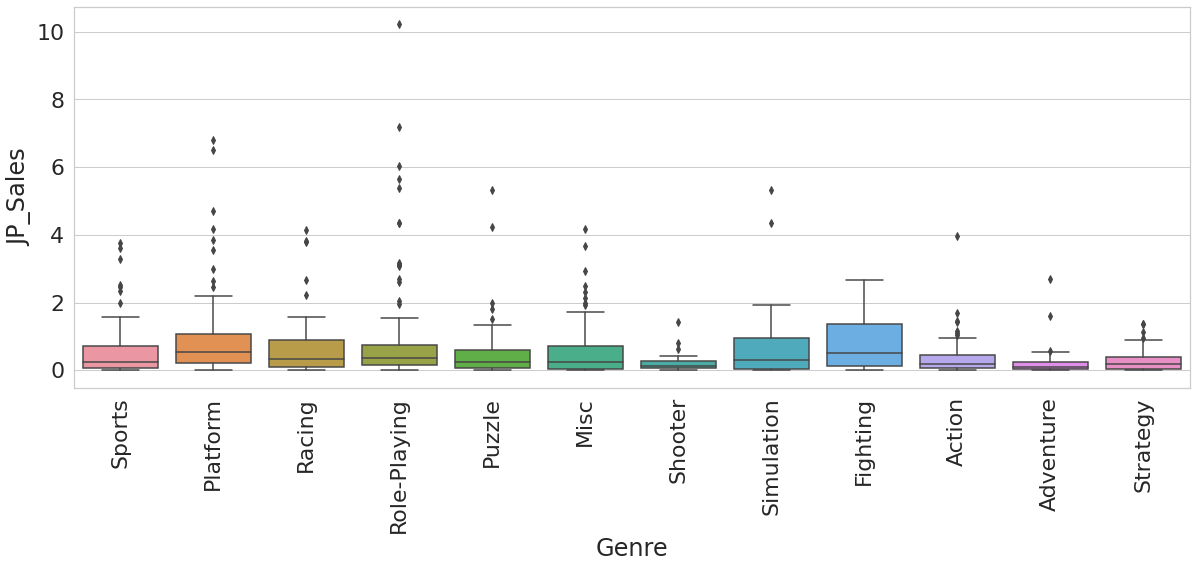

In [75]:
# Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:
# по оси x будет расположен жанр игры (Genre)
# по оси у – объем продаж в Японии (JP_sales)


sns.set(font_scale = 2, style='whitegrid',rc={'figure.figsize':(20,7)})
ax_1 = sns.boxplot(x = 'Genre', y = 'JP_Sales', data = df.query("Publisher == 'Nintendo'"))
ax_1.tick_params(axis = 'x', rotation = 90)


Наибольший межквартильный размах наблюдается у игр жанра Fighting
Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
Межквартильный размах у Strategy меньше, чем у Puzzle

In [98]:
# Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: 
#     Fighting, Simulation, Platform, Racing, Sports.

df_2 = df.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports') and Publisher == 'Nintendo'") \
        .groupby(['Genre', 'Year'], as_index = False) \
        ['Global_Sales'].sum()

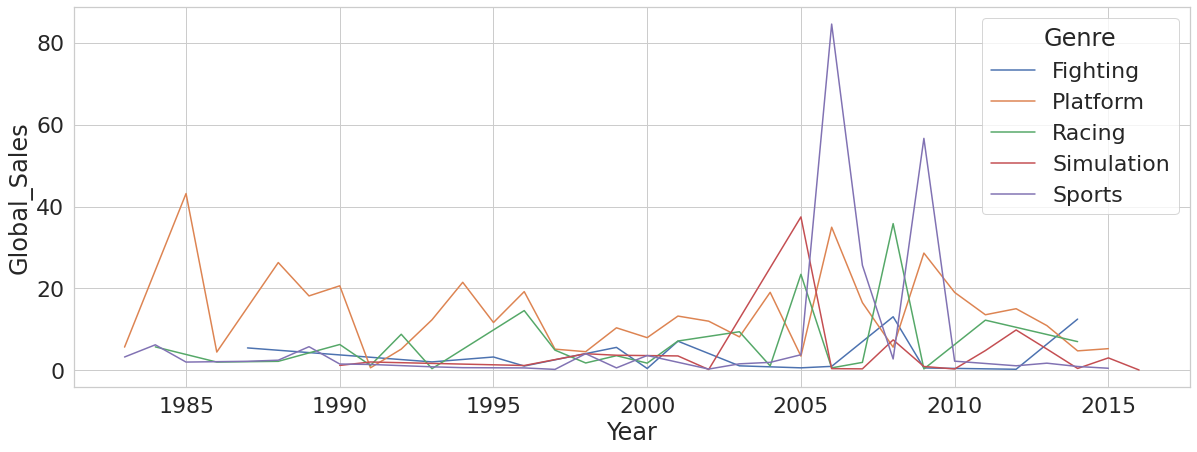

In [83]:
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = df_2)